posx and posy should be finite values
posx and posy should be finite values


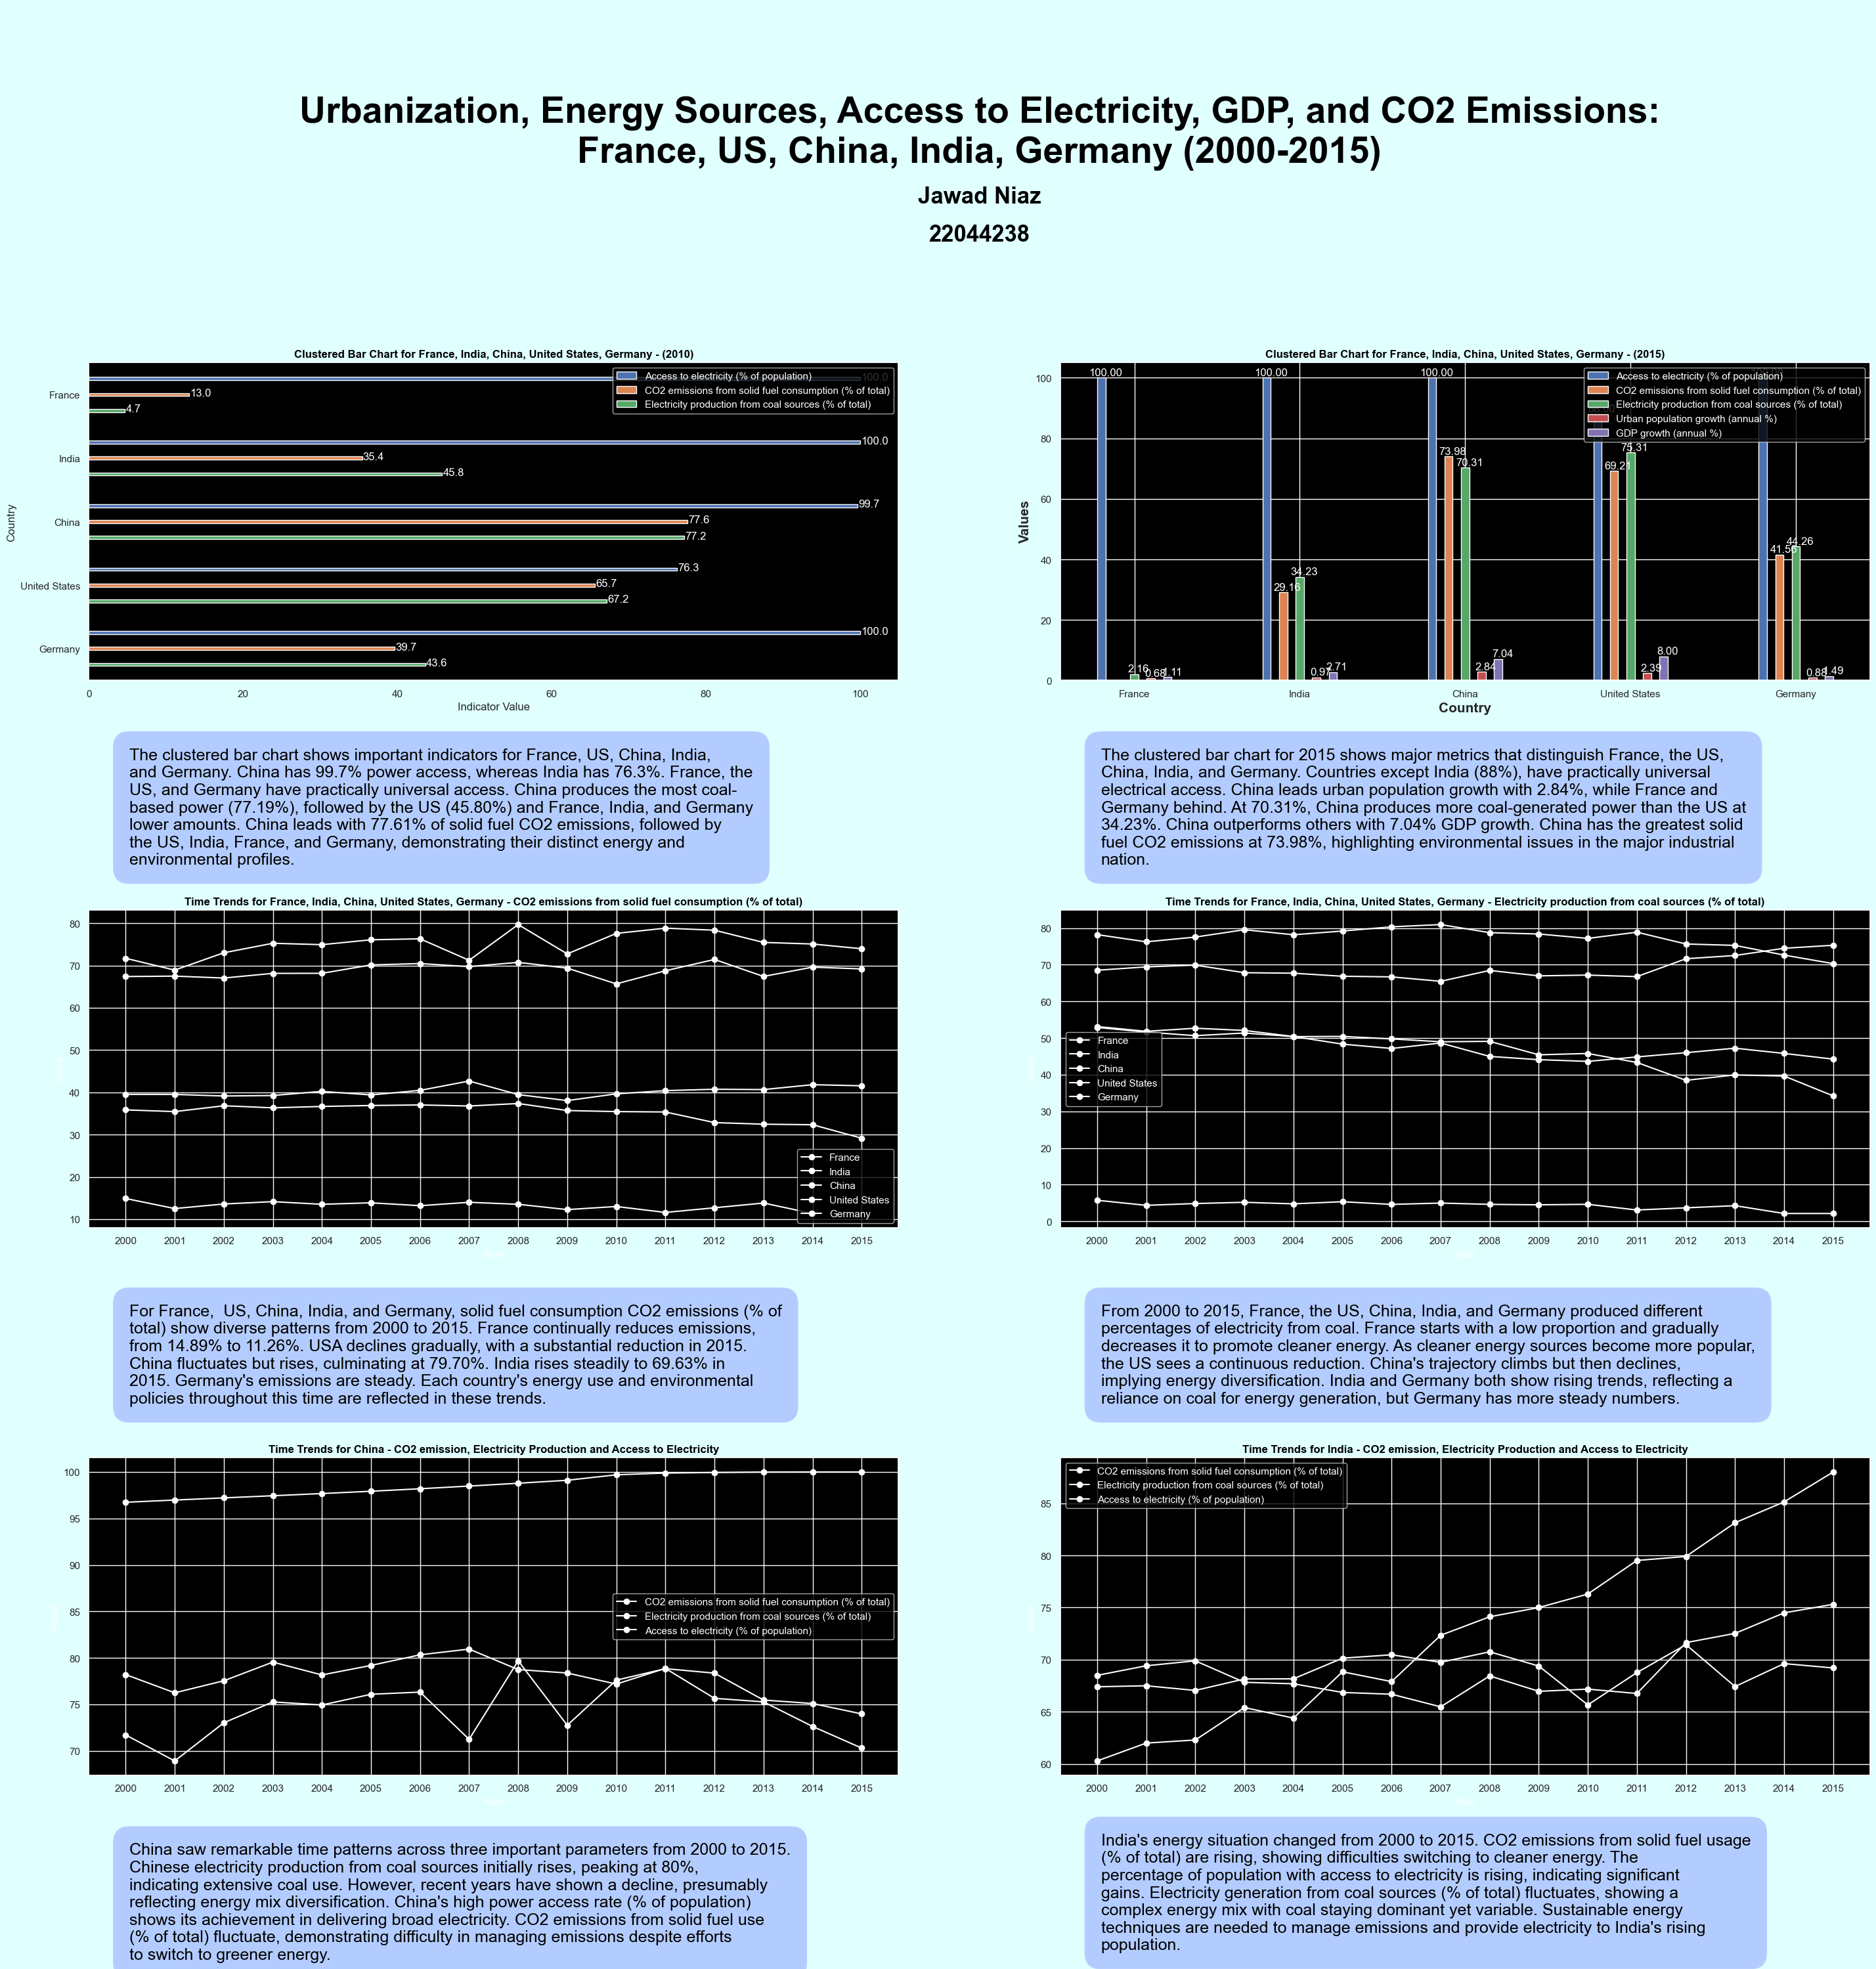

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import textwrap

# Load the dataset
file_path = r'./content/Poster_Data.csv'
data = pd.read_csv(file_path)

# Set the background style
sns.set(rc={'axes.facecolor': 'black', 'figure.facecolor': 'lightcyan', 'text.color': 'white'})

# Create plots
fig, axs = plt.subplots(nrows=4, ncols=2, figsize=(35, 35), gridspec_kw={'height_ratios': [0.4, 1, 1, 1], 'hspace': 0.85})

title_text = "Urbanization, Energy Sources, Access to Electricity, GDP, and CO2 Emissions: France, US, China, India, Germany (2000-2015)"
student_name = 'Jawad Niaz'
student_id = '22044238'

axs[0, 0].remove()  # Remove the existing subplot
axs[0, 1].remove()  # Remove the first row in the second column

axs[0, 0] = fig.add_subplot(4, 2, (1, 2))  

axs[0, 0].wrapped_text = textwrap.fill(title_text, width=80)
axs[0, 0].text(0.5, 0.0, axs[0, 0].wrapped_text, ha='center', va='center', weight='bold', color='black', fontsize=40, transform=axs[0, 0].transAxes)

axs[0, 0].text(0.5, -0.5, student_name, ha='center', va='center', weight='bold', color='black', fontsize=25, transform=axs[0, 0].transAxes)
axs[0, 0].text(0.5, -0.8, student_id, ha='center', va='center', weight='bold', color='black', fontsize=25, transform=axs[0, 0].transAxes)
axs[0, 0].axis('off') 
axs[0, 1].axis('off')  

# Graphs

# Plot 1
# Select specific indicators, countries, and year for analysis
indicators_to_analyze = ['Access to electricity (% of population)', 'CO2 emissions from solid fuel consumption (% of total)', 'Electricity production from coal sources (% of total)']
selected_countries = ['France', 'India', 'China', 'United States', 'Germany']
selected_year = '2010'

# Loop through each indicator and plot a clustered bar chart
for i, indicator in enumerate(indicators_to_analyze):
    selected_data = data[(data['Indicator Name'] == indicator) & (data['Country Name'].isin(selected_countries))]
    values = selected_data[selected_year].astype(float)

    bar_positions = np.arange(len(selected_countries))
    bar_width = 0.05

    axs[1, 0].barh(bar_positions + i * len(selected_countries) * bar_width, values, height=bar_width, label=indicator)

    # Add labels to each bar outside the bars
    for j, value in enumerate(values):
        axs[1, 0].text(value + 0.1, bar_positions[j] + i * len(selected_countries) * bar_width - bar_width / 2, f'{value:.1f}', ha='left', va='center', color='white')

# Customize legend and plot
axs[1, 0].legend()
axs[1, 0].invert_yaxis()
axs[1, 0].set_yticks(bar_positions + (len(indicators_to_analyze) - 1) * len(selected_countries) * bar_width / 2, selected_countries)
axs[1, 0].set_xlabel('Indicator Value')
axs[1, 0].set_ylabel('Country')
axs[1, 0].set_title(f'Clustered Bar Chart for {", ".join(selected_countries)} - ({selected_year})', fontweight='bold', color='black')
axs[1, 0].grid(False)

# Explanation for Plot 1

long_text_1 = 'The clustered bar chart shows important indicators for France, US, China, India, and Germany. China has 99.7% power access, whereas India has 76.3%. France, the US, and Germany have practically universal access. China produces the most coal-based power (77.19%), followed by the US (45.80%) and France, India, and Germany lower amounts. China leads with 77.61% of solid fuel CO2 emissions, followed by the US, India, France, and Germany, demonstrating their distinct energy and environmental profiles.'

axs[1, 0].wrapped_text = textwrap.fill(long_text_1, width=80)
axs[1, 0].text(0.05, -0.4, axs[1, 0].wrapped_text, ha='left', va='center', color='black', fontsize=18, transform=axs[1, 0].transAxes, bbox=dict(boxstyle='round', facecolor='blue', alpha=0.2, pad =1))

# Plot 2
# Select specific indicators for analysis
indicators_to_analyze = ['Access to electricity (% of population)', 'CO2 emissions from solid fuel consumption (% of total)', 'Electricity production from coal sources (% of total)', 'Urban population growth (annual %)', 'GDP growth (annual %)']

# Select the specific countries for analysis
selected_countries = ['France', 'India', 'China', 'United States', 'Germany']

# Select the specific year for analysis
selected_year = '2015'

# Filter data for the selected indicators, countries, and year
selected_data = data[(data['Indicator Name'].isin(indicators_to_analyze)) & (data['Country Name'].isin(selected_countries))]

# Prepare data for the bar chart
bar_positions = np.arange(len(selected_countries))
bar_width = 0.05
bar_gap = 0.05

for i, indicator in enumerate(indicators_to_analyze):
    values = selected_data[(selected_data['Indicator Name'] == indicator)][selected_year].astype(float).values

    axs[1, 1].bar(bar_positions + i * (bar_width + bar_gap), values, width=bar_width, label=indicator)

    for j, value in enumerate(values):
        axs[1, 1].text(bar_positions[j] + i * (bar_width + bar_gap) + bar_width / 2, value + 0.1, f'{value:.2f}', ha='center', va='bottom')

# Adding Xticks
axs[1, 1].set_xlabel('Country', fontweight='bold', fontsize=15)
axs[1, 1].set_ylabel('Values', fontweight='bold', fontsize=15)
axs[1, 1].set_title(f'Clustered Bar Chart for {", ".join(selected_countries)} - ({selected_year})', fontweight='bold', color='black')
axs[1, 1].set_xticks(bar_positions + (len(indicators_to_analyze) - 1) * (bar_width + bar_gap) / 2)
axs[1, 1].set_xticklabels(selected_countries)
axs[1, 1].legend()

# Explanation for Plot 2

long_text_2 = 'The clustered bar chart for 2015 shows major metrics that distinguish France, the US, China, India, and Germany. Countries except India (88%), have practically universal electrical access. China leads urban population growth with 2.84%, while France and Germany behind. At 70.31%, China produces more coal-generated power than the US at 34.23%. China outperforms others with 7.04% GDP growth. China has the greatest solid fuel CO2 emissions at 73.98%, highlighting environmental issues in the major industrial nation.'

axs[1, 1].wrapped_text = textwrap.fill(long_text_2, width=88)
axs[1, 1].text(0.05, -0.4, axs[1, 1].wrapped_text, ha='left', va='center', color='black', fontsize=18, transform=axs[1, 1].transAxes, bbox=dict(boxstyle='round', facecolor='blue', alpha=0.2, pad =1))

# Plot 3

# Select specific indicator for analysis
indicator_to_analyze_third_plot = 'CO2 emissions from solid fuel consumption (% of total)'

# Select the specific countries for analysis
selected_countries = ['France', 'India', 'China', 'United States', 'Germany']

# Filter data for selected indicator and countries
selected_data_third_plot = data[(data['Indicator Name'] == indicator_to_analyze_third_plot) & (data['Country Name'].isin(selected_countries))]

for country in selected_countries:
    country_data = selected_data_third_plot[selected_data_third_plot['Country Name'] == country]
    axs[2, 0].plot(country_data.columns[2:], country_data.iloc[0, 2:], marker='o', label=country, color='white')

axs[2, 0].set_xlabel('Year', color='white')
axs[2, 0].set_ylabel('Value', color='white')
axs[2, 0].set_title(f'Time Trends for {", ".join(selected_countries)} - {indicator_to_analyze_third_plot}', fontweight='bold', color='black')
axs[2, 0].legend()

# Explanation for Plot 3

long_text_3 = 'For France,  US, China, India, and Germany, solid fuel consumption CO2 emissions (% of total) show diverse patterns from 2000 to 2015. France continually reduces emissions, from 14.89% to 11.26%. USA declines gradually, with a substantial reduction in 2015. China fluctuates but rises, culminating at 79.70%. India rises steadily to 69.63% in 2015. Germany\'s emissions are steady. Each country\'s energy use and environmental policies throughout this time are reflected in these trends.'

axs[2, 0].wrapped_text = textwrap.fill(long_text_3, width=88)
axs[2, 0].text(0.05, -0.4, axs[2, 0].wrapped_text, ha='left', va='center', color='black', fontsize=18, transform=axs[2, 0].transAxes, bbox=dict(boxstyle='round', facecolor='blue', alpha=0.2, pad =1))

# Plot 4

# Select specific indicator for analysis
indicator_to_analyze_forth_plot = 'Electricity production from coal sources (% of total)'

# Filter data for selected indicator and countries
selected_data_forth_plot = data[(data['Indicator Name'] == indicator_to_analyze_forth_plot) & (data['Country Name'].isin(selected_countries))]

for country in selected_countries:
    country_data = selected_data_forth_plot[selected_data_forth_plot['Country Name'] == country]
    axs[2, 1].plot(country_data.columns[2:], country_data.iloc[0, 2:], marker='o', label=country, color='white')

axs[2, 1].set_xlabel('Year', color='white')
axs[2, 1].set_ylabel('Value', color='white')
axs[2, 1].set_title(f'Time Trends for {", ".join(selected_countries)} - {indicator_to_analyze_forth_plot}', fontweight='bold', color='black')
axs[2, 1].legend()

# Explanation for Plot 4

long_text_4 = 'From 2000 to 2015, France, the US, China, India, and Germany produced different percentages of electricity from coal. France starts with a low proportion and gradually decreases it to promote cleaner energy. As cleaner energy sources become more popular, the US sees a continuous reduction. China\'s trajectory climbs but then declines, implying energy diversification. India and Germany both show rising trends, reflecting a reliance on coal for energy generation, but Germany has more steady numbers.'

axs[2, 1].wrapped_text = textwrap.fill(long_text_4, width=88)
axs[2, 1].text(0.05, -0.4, axs[2, 1].wrapped_text, ha='left', va='center', color='black', fontsize=18, transform=axs[2, 1].transAxes, bbox=dict(boxstyle='round', facecolor='blue', alpha=0.2, pad =1))

#plot 5

# Select specific indicators for analysis
indicators_to_analyze_fifth_plot = ['CO2 emissions from solid fuel consumption (% of total)',
                         'Electricity production from coal sources (% of total)',
                         'Access to electricity (% of population)']

# Select the specific country for analysis
selected_country_fifth_plot = 'China'

# Filter data for selected indicators and country
selected_data_fifth_plot = data[(data['Indicator Name'].isin(indicators_to_analyze_fifth_plot)) & (data['Country Name'] == selected_country_fifth_plot)]

for indicator in indicators_to_analyze_fifth_plot:
    indicator_data = selected_data_fifth_plot[selected_data_fifth_plot['Indicator Name'] == indicator]
    axs[3, 0].plot(indicator_data.columns[2:], indicator_data.iloc[0, 2:], marker='o', label=indicator, color='white')

axs[3, 0].set_xlabel('Year', color='white')
axs[3, 0].set_ylabel('Value', color='white')
axs[3, 0].set_title(f'Time Trends for {selected_country_fifth_plot} - CO2 emission, Electricity Production and Access to Electricity', fontdict={'fontweight': 'bold', 'color': 'black'})
axs[3, 0].legend()

# Explanation for Plot 5

long_text_5 = 'China saw remarkable time patterns across three important parameters from 2000 to 2015. Chinese electricity production from coal sources initially rises, peaking at 80%, indicating extensive coal use. However, recent years have shown a decline, presumably reflecting energy mix diversification. China\'s high power access rate (% of population) shows its achievement in delivering broad electricity. CO2 emissions from solid fuel use (% of total) fluctuate, demonstrating difficulty in managing emissions despite efforts to switch to greener energy.'

axs[3, 0].wrapped_text = textwrap.fill(long_text_5, width=88)
axs[3, 0].text(0.05, -0.4, axs[3, 0].wrapped_text, ha='left', va='center', color='black', fontsize=18, transform=axs[3, 0].transAxes, bbox=dict(boxstyle='round', facecolor='blue', alpha=0.2, pad =1))

# Plot 6

# Select specific indicators for analysis
indicators_to_analyze_sixth_plot = ['CO2 emissions from solid fuel consumption (% of total)',
                                     'Electricity production from coal sources (% of total)',
                                     'Access to electricity (% of population)']

# Select the specific country for analysis
selected_country_sixth_plot = 'India'

# Filter data for selected indicators and country
selected_data_sixth_plot = data[(data['Indicator Name'].isin(indicators_to_analyze_sixth_plot)) & (data['Country Name'] == selected_country_sixth_plot)]

for indicator in indicators_to_analyze_sixth_plot:
    indicator_data = selected_data_sixth_plot[selected_data_sixth_plot['Indicator Name'] == indicator]
    axs[3, 1].plot(indicator_data.columns[2:], indicator_data.iloc[0, 2:], marker='o', label=indicator, color='white')

axs[3, 1].set_xlabel('Year', color='white')
axs[3, 1].set_ylabel('Value', color='white')
axs[3, 1].set_title(f'Time Trends for {selected_country_sixth_plot} - CO2 emission, Electricity Production and Access to Electricity', fontweight='bold', color='black')
axs[3, 1].legend()

# Explanation for Plot 6

long_text_6 = 'India\'s energy situation changed from 2000 to 2015. CO2 emissions from solid fuel usage (% of total) are rising, showing difficulties switching to cleaner energy. The percentage of population with access to electricity is rising, indicating significant gains. Electricity generation from coal sources (% of total) fluctuates, showing a complex energy mix with coal staying dominant yet variable. Sustainable energy techniques are needed to manage emissions and provide electricity to India\'s rising population.'

axs[3, 1].wrapped_text = textwrap.fill(long_text_6, width=88)
axs[3, 1].text(0.05, -0.37, axs[3, 1].wrapped_text, ha='left', va='center', color='black', fontsize=18, transform=axs[3, 1].transAxes, bbox=dict(boxstyle='round', facecolor='blue', alpha=0.2, pad =1))

# Save the figure as a PNG file
#plt.savefig("22044238.png", dpi=300)
plt.show()

In [7]:
!dir

 Volume in drive C is Windows
 Volume Serial Number is 9A8D-5652

 Directory of C:\Users\Guest User\Desktop

01/10/2024  01:53 PM    <DIR>          .
01/10/2024  11:58 AM    <DIR>          ..
01/10/2024  01:46 PM    <DIR>          .ipynb_checkpoints
01/10/2024  11:15 AM    <DIR>          20068101 assignment
01/10/2024  12:02 PM         1,709,279 20068101.ipynb
01/10/2024  11:22 AM            20,427 20068101.py
01/10/2024  01:53 PM            51,661 22044238.ipynb
12/13/2023  10:22 PM             8,464 ASSIGNMENT.py
01/10/2024  11:35 AM    <DIR>          content
12/13/2023  07:34 PM             8,956 Dataset.csv
12/10/2023  06:21 PM               209 quiz3.txt
12/13/2023  11:15 PM             8,581 statistics and trends.py
11/10/2023  08:08 AM           522,347 Zaeema Nasir.docx
               8 File(s)      2,329,924 bytes
               5 Dir(s)  19,580,944,384 bytes free
